# Radicle Grants Program (RGP) - Committee Compensation

The analysis below looks at the last 6 months of RAD prices, denominated in USD terms.

The main goal of the analysis is to gauge a very conservative estimate of the amount of RAD needed in the RGP's multi-sig wallet in order to pay committee members. This is to ensure that we have enough RAD to pay committee members in meaningful equity without running out of RAD due to fluctuations in conversion rates. 

There are a few charts to show the price over time, but these are not important to the outcome of the analysis.

Source: https://www.coingecko.com/en/coins/radicle/historical_data/usd?end_date=2021-11-24&start_date=2021-05-29#panel

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
time_series_df = pd.read_csv('rad-usd-max.csv')
time_series_df

# url = "https://www.coingecko.com/price_charts/export/14013/usd.csv"
# time_series_df = pd.read_csv(url)

,snapped_at,price,market_cap,total_volume
0,2021-08-14 00:00:00 UTC,9.147861,1.820627e+08,3.116260e+06
1,2021-08-15 00:00:00 UTC,8.551744,1.700891e+08,1.458007e+06
2,2021-08-16 00:00:00 UTC,8.056448,1.603859e+08,9.608261e+05
3,2021-08-17 00:00:00 UTC,7.461315,1.486583e+08,1.236060e+06
4,2021-08-18 00:00:00 UTC,7.385115,1.471319e+08,7.836312e+05
...,...,...,...,...
180,2022-02-10 00:00:00 UTC,6.067857,2.235524e+08,9.213753e+06
181,2022-02-11 00:00:00 UTC,5.701208,2.098866e+08,8.533451e+06
182,2022-02-12 00:00:00 UTC,5.427645,2.002791e+08,6.548640e+06
183,2022-02-13 00:00:00 UTC,5.350140,1.971101e+08,4.876014e+06


In [4]:
price_time_series_df = time_series_df['price']
price_time_series_df

0      9.147861
1      8.551744
2      8.056448
3      7.461315
4      7.385115
         ...   
180    6.067857
181    5.701208
182    5.427645
183    5.350140
184    5.490072
Name: price, Length: 185, dtype: float64

## Average Price

In [5]:
average_price = price_time_series_df.mean()
average_price

10.341306813536843

In [8]:
print(f'The average price of RAD was ${average_price:.2f} (USD) in the last 6 months (180 days).')

The average price of RAD was $10.34 (USD) in the last 6 months (180 days).


## Standard Deviation

In [6]:
standard_deviation = price_time_series_df.std()
standard_deviation

2.9132204039553904

In [9]:
print(f'The standard deviation in price was +/- ${standard_deviation:.2f} (USD) in the last 6 months (180 days).')

The standard deviation in price was +/- $2.91 (USD) in the last 6 months (180 days).


## Outcome/Takeaway

The main goal here is to ensure we have enough RAD to pay RGP Committee members in RAD, even with flucuations in the RAD:USD conversion rate.

Let's start with some key points:
* We have 6 committee members
* A high estimate of time worked would be 50 hours per month, over 6 months. This totals to 1,800 hours.
* At 150 (USD) per hour, this would total 270,000 (USD) worth of RAD for the entire 6 months.

In [10]:
committee_members = 6
monthly_hours = 50
grants_program_lengths_in_months = 6
total_hours_worked = committee_members * monthly_hours * grants_program_lengths_in_months

hourly_compensation_usd = 150
total_rad_compensation_usd = total_hours_worked * 150
total_rad_compensation_usd

270000

I propose that we use the following formula to determine the amount of RAD needed to be transferred from the Radicle Treasury to the RGP's multi-sig wallet:

`RAD to Transfer = $270,000 / (AVG Price over 6 months - STD of price)`


In [11]:
rad_to_transfer = total_rad_compensation_usd / (average_price - standard_deviation)
rad_to_transfer

36348.52707848529

Or in plain English: we should transfer 44,108 RAD from the Radicle Treasury to the RGP's multi-sig wallet.

Any unused funds at the end of the 6 months would be transferred back to the Radicle Treasury.

# Appendix

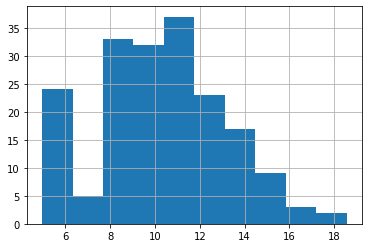

In [12]:
from matplotlib import pyplot

# series = read_csv('daily-minimum-temperatures.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
price_time_series_df.hist()
pyplot.show()

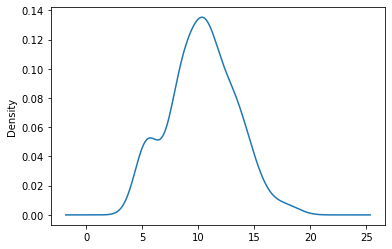

In [13]:
price_time_series_df.plot(kind='kde')
pyplot.show()